LABWORK 1: House Pricing


In [4]:
!pip install pandas numpy scikit-learn matplotlib


DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\bs4-0.0.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\lxml-5.3.0-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\narwhals-1.19.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\l

1. Chuẩn bị & Tiền xử lý dữ liệu


In [ ]:
# ===== Nhiệm vụ 1 =====
# 1. Import thư viện
import pandas as pd
from sklearn.model_selection import train_test_split

# 2. Load dữ liệu
df = pd.read_csv(
    r'E:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 1\Real estate.csv')

# 3. Drop cột không cần thiết
df_clean = df.drop(columns=['No', 'X1 transaction date'])

# 4. Xác định X, y cho Task 2
X = df_clean[['X2 house age']]
y = df_clean['Y house price of unit area']

# 5. Split 80% train – 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set : {X_test.shape[0]} samples")


Train set: 331 samples
Test set : 83 samples


Task 2: Simple Linear Regression với House Age


Regression equation: ŷ = -0.2598 * (House Age) + 42.8829
RMSE: 12.8532
MAE : 10.6212


c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


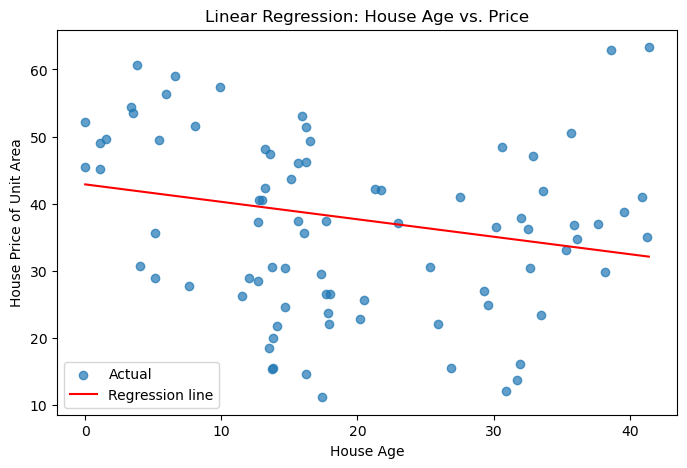

In [ ]:
# ===== Nhiệm vụ 2 =====
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Khởi tạo + huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Dự đoán trên test set
y_pred = model.predict(X_test)

# 3. Lấy hệ số a, intercept b
a = model.coef_[0]
b = model.intercept_
print(f"Regression equation: ŷ = {a:.4f} * (House Age) + {b:.4f}")

# 4. Tính RMSE & MAE “thủ công”
mse = mean_squared_error(y_test, y_pred)    # MSE
rmse = np.sqrt(mse)                          # RMSE = √MSE
mae = mean_absolute_error(y_test, y_pred)   # MAE

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")

# 5. Vẽ scatter + regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)
# generate điểm để vẽ line
xx = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
yy = model.predict(xx)
plt.plot(xx, yy, color='red', label='Regression line')
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.title('Linear Regression: House Age vs. Price')
plt.legend()
plt.show()
